In [1]:
def get_model():
    from keras.models import Sequential
    from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

    conv_kerr_size = (3, 3)
    maxpool_kerr_size = (2, 2)
    model = Sequential()
    model.add(Conv2D(32, conv_kerr_size, activation='relu', input_shape=(48, 48, 1)))
    # model.add(Conv2D(32, conv_kerr_size, activation='relu', padding='same'))
    model.add(MaxPooling2D(maxpool_kerr_size))
    model.add(BatchNormalization())

    model.add(Conv2D(64, conv_kerr_size, activation='relu'))
    # model.add(Conv2D(64, conv_kerr_size, activation='relu', padding='same'))
    model.add(MaxPooling2D(maxpool_kerr_size))
    model.add(BatchNormalization())

    model.add(Conv2D(128, conv_kerr_size, activation='relu'))
    # model.add(Conv2D(128, conv_kerr_size, activation='relu', padding='same'))
    model.add(Conv2D(256, (5, 5), activation='relu'))
    # model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(7, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                      metrics=['acc'])
    return model
model = get_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 23, 23, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 23, 23, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)         7

In [2]:
from keras.preprocessing.image import ImageDataGenerator
from simplified_keras.dir_flow_generators import get_train_val_generators
import numpy as np

img_size = (48, 48)
img_datagen = ImageDataGenerator(rescale=1/255)
img_batch_size = 128

train_generator, validation_generator = get_train_val_generators(img_datagen, data_dir='../data/normal/',
                                                                 color_mode='grayscale', target_size=img_size)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [3]:
import keras.callbacks as clb
callbacks = [
    clb.ReduceLROnPlateau(monitor='val_acc', factor=0.1, min_lr=1e-7, patience=2, verbose=1),
    clb.EarlyStopping(monitor='val_acc', patience=4, verbose=1),
    # clb.ModelCheckpoint(monitor='val_acc', filepath='../models/standard_model.h5', save_best_only=True, verbose=1)
]
nr_of_train_pictures = 28709
train_steps = nr_of_train_pictures // img_batch_size + 1
nr_of_valid_pictures = 3589
valid_steps = nr_of_valid_pictures // img_batch_size + 1
history = model.fit(train_generator,
                    steps_per_epoch=train_steps,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=valid_steps,
                    # callbacks=callbacks
                    )

Epoch 1/10
225/225 [==============================] - 16s 60ms/step - loss: 2.1542 - acc: 0.3090 - val_loss: 1.8275 - val_acc: 0.1722

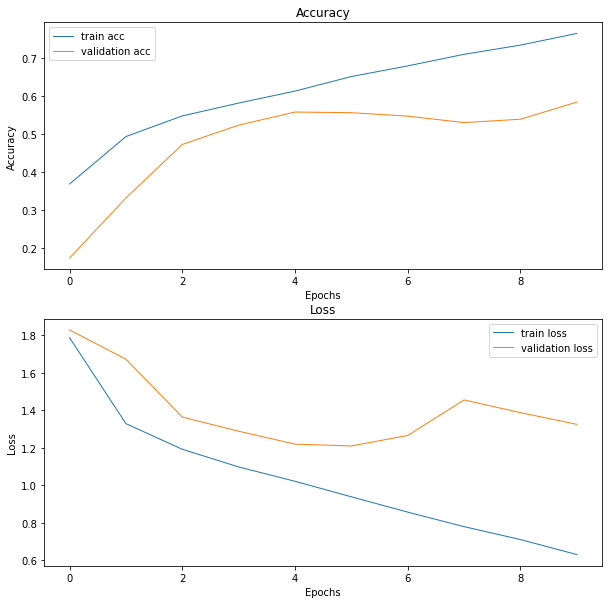

<module 'matplotlib.pyplot' from '/home/albert/anaconda3/envs/AWD/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [7]:
from simplified_keras.plots.history_plots import plot_acc_and_loss
fig = plot_acc_and_loss(history)
fig.savefig('t', bbox_inches='tight')